In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(0)
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/advertising.csv')

In [ ]:
def load_data_from_file(filename):
  data = np.genfromtxt(filename, dtype=None, delimiter=',', skip_header=1)
  features_X = data[:, :3]
  sales_Y =  data[:, 3]

  ones_column = np.ones((features_X.shape[0], 1))
  features_X = np.hstack((ones_column, features_X))


  return features_X, sales_Y

In [ ]:
# Question 2:
features_X, _ = load_data_from_file('/content/advertising.csv')
print(features_X[:5, :])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [ ]:
# Question 3:
_ , sales_Y = load_data_from_file ('/content/advertising.csv')
print(sales_Y.shape)

(200,)


In [ ]:
def create_individual(n=4, bound=10):
  individual = []

  for i in range(n):
    gene = random.uniform(-bound/2, bound/2)
    individual.append(gene)

  return individual

individual = create_individual()
print(individual)

[3.4442185152504816, 2.5795440294030243, -0.79428419169155, -2.4108324970703663]


In [ ]:
features_X, sales_Y = load_data_from_file('/content/advertising.csv')

def compute_loss(individual):

  theta = np.array(individual)
  y_hat = features_X.dot(theta)
  loss = np.multiply((y_hat-sales_Y), (y_hat-sales_Y)).mean()

  return loss

def compute_fitness(individual):
  loss = compute_loss(individual)

  fitness_value = 1 / (loss+1)

  return fitness_value

In [ ]:
#question 4:
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


In [ ]:
def crossover(individual1, individual2, crossover = 0.9):
  individual1 = individual1.copy()
  individual2 = individual2.copy()

  for i in range(len(individual1)):
    if random.random() < crossover:
      individual1[i], individual2[i] = individual2[i], individual1[i]

  return individual1, individual2

In [ ]:
# question 5
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
individual1 , individual2 = crossover(individual1, individual2, 2.0)
print(" individual1 : " , individual1)
print(" individual2 : " , individual2)

 individual1 :  [3.44, 2.57, -0.79, -2.41]
 individual2 :  [4.09, 4.82, 3.1, 4.02]


In [ ]:
def mutate(individual, mutation_rate=0.05):
  individual = individual.copy()

  for i in range(len(individual)):
    if random.random() < mutation_rate:
      individual[i] = random.uniform(-10, 10)

  return individual

In [ ]:
# Question 6:
before_individual = [4.09 , 4.82 , 3.10 , 4.02]
after_individual = mutate(individual ,mutation_rate = 2.0)
print(before_individual == after_individual)

False


In [ ]:
def initializePopulation(m):
  population = [create_individual() for i in range(m)]
  return population

In [ ]:
population = initializePopulation(100)
print(len(population))

100


In [ ]:
def selection(sorted_old_population, m=100):
  index1 = random.randint(0,m-1)
  while True:
    index2 = random.randint(0,m-1)
    if index2 != index1:
      break

  individual_s = sorted_old_population[index1]
  if index2 > index1:
    individual_s = sorted_old_population[index2]

  return individual_s

In [ ]:
population = initializePopulation(m=100)
individual_s = selection(population, m = 100)
print(individual_s)

[-2.512158059926024, -2.07369996595507, -2.28881632355559, 3.9664971452703046]


In [ ]:
def create_new_population(old_population, elitism=2, gen=1):
  m = len(old_population)
  sorted_population = sorted(old_population, key=compute_fitness)

  if gen % 1 == 0:
    print('Best loss:', compute_loss(sorted_population[m-1]), 'with chromsome: ', sorted_population[m-1])

  new_population = []
  while len(new_population) < m-elitism:
    # selection
    individual1 = selection(sorted_population)
    individual2 = selection(sorted_population)

    # crossover
    individual1, individual2 = crossover(individual1, individual2)

    # mutation
    individual1 = mutate(individual1)
    individual2 = mutate(individual2)

    new_population.append(individual1)
    new_population.append(individual2)

  for ind in sorted_population[m-elitism:]:
    new_population.append(ind)

  return new_population, compute_loss(sorted_population[m-1])

In [ ]:
# Question 7
individual1 = [4.09 , 4.82 , 3.10 , 4.02]
individual2 = [3.44 , 2.57 , -0.79 , -2.41]
old_population = [individual1 ,individual2]
new_population , _ = create_new_population(old_population ,elitism =2 ,gen =1)

Best loss: 123415.051528805 with chromsome:  [3.44, 2.57, -0.79, -2.41]


In [26]:
def run_GA():
  n_generations = 100
  m = 600
  features_X, sales_Y = load_data_from_file('/content/advertising.csv')
  population = initializePopulation(m)
  losses_list = []

  for generation in range(n_generations):
    population, loss = create_new_population(population, elitism=2)
    losses_list.append(loss)

  return losses_list

losses_list = run_GA()

Best loss: 278.68355655844107 with chromsome:  [-0.6230418758172327, 0.06169193364736092, 0.6190023468719321, 0.1857978714754971]
Best loss: 278.68355655844107 with chromsome:  [-0.6230418758172327, 0.06169193364736092, 0.6190023468719321, 0.1857978714754971]
Best loss: 278.68355655844107 with chromsome:  [-0.6230418758172327, 0.06169193364736092, 0.6190023468719321, 0.1857978714754971]
Best loss: 278.68355655844107 with chromsome:  [-0.6230418758172327, 0.06169193364736092, 0.6190023468719321, 0.1857978714754971]
Best loss: 278.68355655844107 with chromsome:  [-0.6230418758172327, 0.06169193364736092, 0.6190023468719321, 0.1857978714754971]
Best loss: 278.68355655844107 with chromsome:  [-0.6230418758172327, 0.06169193364736092, 0.6190023468719321, 0.1857978714754971]
Best loss: 278.68355655844107 with chromsome:  [-0.6230418758172327, 0.06169193364736092, 0.6190023468719321, 0.1857978714754971]
Best loss: 278.68355655844107 with chromsome:  [-0.6230418758172327, 0.06169193364736092, 

Best loss: 1274.9490089487806 with chromsome:  [0.5559993804107055, 0.39195020664198577, -0.4551682075740615, -0.6887641975625405]
Best loss: 1274.9490089487806 with chromsome:  [0.5559993804107055, 0.39195020664198577, -0.4551682075740615, -0.6887641975625405]
Best loss: 1274.9490089487806 with chromsome:  [0.5559993804107055, 0.39195020664198577, -0.4551682075740615, -0.6887641975625405]
Best loss: 1274.9490089487806 with chromsome:  [0.5559993804107055, 0.39195020664198577, -0.4551682075740615, -0.6887641975625405]
Best loss: 1274.9490089487806 with chromsome:  [0.5559993804107055, 0.39195020664198577, -0.4551682075740615, -0.6887641975625405]
Best loss: 1274.9490089487806 with chromsome:  [0.5559993804107055, 0.39195020664198577, -0.4551682075740615, -0.6887641975625405]
Best loss: 1274.9490089487806 with chromsome:  [0.5559993804107055, 0.39195020664198577, -0.4551682075740615, -0.6887641975625405]
Best loss: 1274.9490089487806 with chromsome:  [0.5559993804107055, 0.3919502066419

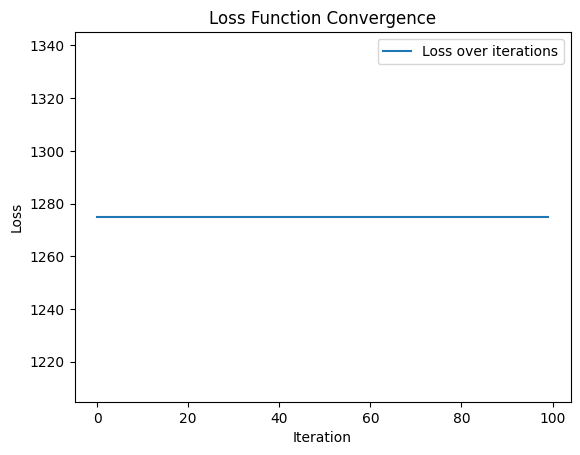

In [27]:
import matplotlib.pyplot as plt
def visualize_loss(losses_list) :
  # Tạo một biểu đồ đường để biểu diễn sự thay đổi của loss
    plt.plot(losses_list, label='Loss over iterations')

    # Đặt tên cho trục x và trục y
    plt.xlabel('Iteration')
    plt.ylabel('Loss')

    # Thêm tiêu đề cho biểu đồ
    plt.title('Loss Function Convergence')

    # Hiển thị nhãn cho đồ thị
    plt.legend()

    # Hiển thị đồ thị
    plt.show()


losses_list = run_GA()
visualize_loss(losses_list)

[4.653000455530915, -0.21439696988460888, -3.081378264917116, 1.7535258273555163]


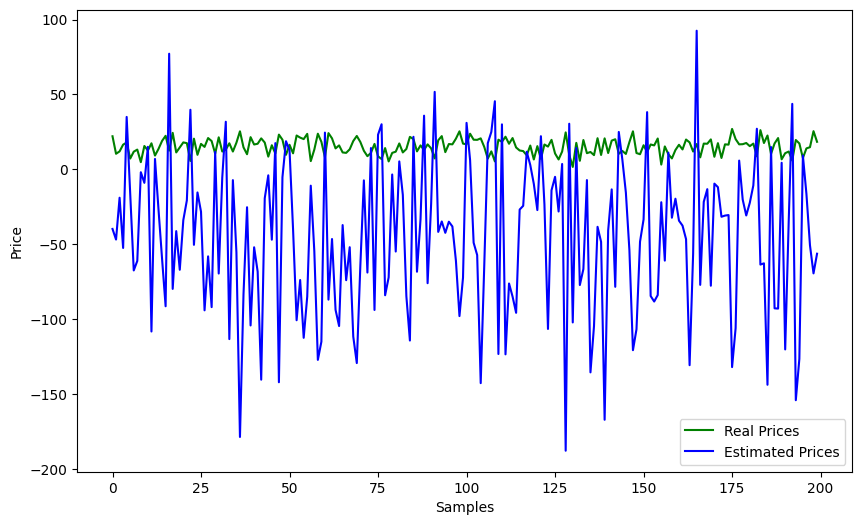

In [28]:
def visualize_predict_gt():
  # visualization of ground truth and predict value
  sorted_population = sorted(population, key=compute_fitness)
  print(sorted_population[-1])
  theta = np.array(sorted_population[-1])

  estimated_prices = []
  for feature in features_X:
    estimated_price = np.dot(feature, theta)
    estimated_prices.append(estimated_price)

  fig, ax = plt.subplots(figsize=(10, 6))
  plt.xlabel('Samples')
  plt.ylabel('Price')
  plt.plot(sales_Y, c='green', label='Real Prices')
  plt.plot(estimated_prices, c='blue', label='Estimated Prices')
  plt.legend()
  plt.show()

visualize_predict_gt()

[4.653000455530915, -0.21439696988460888, -3.081378264917116, 1.7535258273555163]


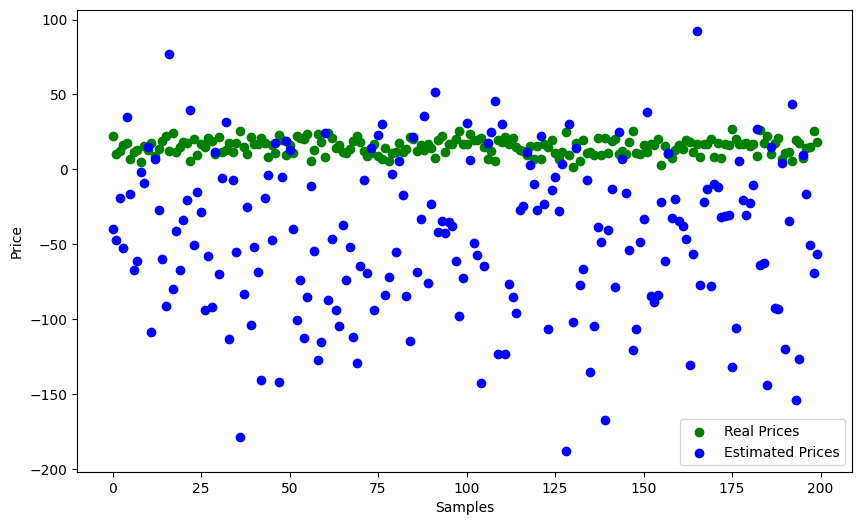

In [29]:
# visualization of ground truth and predict value
sorted_population = sorted(population, key=compute_fitness)
print(sorted_population[-1])
theta = np.array(sorted_population[-1])

estimated_prices = []
samples = [i for i in range(len(features_X))]
for feature in features_X:
    estimated_price = sum(c*x for x, c in zip(feature, theta))
    estimated_prices.append(estimated_price)
fig, ax = plt.subplots(figsize=(10, 6))
# plt.plot(prices, c='green')
# plt.plot(estimated_prices, c='red')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.scatter(samples, sales_Y, c='green', label='Real Prices')
plt.scatter(samples, estimated_prices, c='blue', label='Estimated Prices')
plt.legend()
plt.show()